# PARTE 1 - REGRESSÃO LINEAR SIMPLES

Carregue o conjunto de dados de gorjetas. Faça o que se pede:
1. Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).
2. Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado
3. Mostre na tela os valores dos pesos (parâmetros).
4. Para um valor de entrada de 30, qual a predição do modelo?
5. Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo. E.g.:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Questão 1
Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).

In [44]:
x = df[['total_bill']]
y = df['tip']

In [45]:
x.shape

(244, 1)

In [46]:
y.shape

(244,)

In [47]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [48]:
# Construindo a predição do modelo
y_pred_model = model.predict(x)
print(y_pred_model[:20])

[2.70463616 2.00622312 3.12683472 3.40725019 3.5028225  3.57633966
 1.84133463 3.74332864 2.49983836 2.47253198 1.99887141 4.6234341
 2.53974767 2.85587147 2.47778321 3.1866987  2.00517288 2.631119
 2.70253567 3.0890259 ]


### Questão 2
Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado

In [49]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y, y_pred_model))

Erro médio quadrático: 1.04


Complemento

In [50]:
# para visualizar o Coeficiente de Determinação
model.score(x,y)

0.45661658635167657

### Questão 3
Mostre na tela os valores dos pesos (parâmetros).

In [51]:
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):    {w1.round(5)}')

Coeficiente de interceptação(Peso w0): 0.9203
Coeficiente de inclinação(Peso w1):    [0.10502]


### Questão 4
Para um valor de entrada de 30, qual a predição do modelo?

In [52]:
#Predição do modelo com o valor de entrada 30
model.predict([[30]])

array([4.07100514])

### Questão 5
Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo.

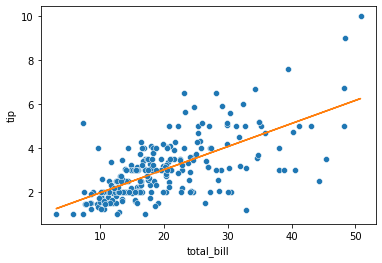

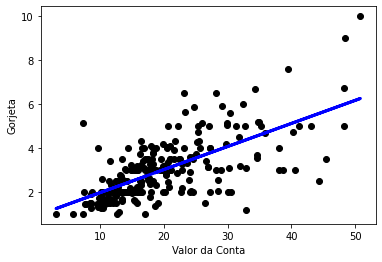

In [53]:
# Plotar com scatterplot
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred_model, color='blue', linewidth=3)
plt.xlabel('Valor da Conta')
plt.ylabel('Gorjeta')
plt.show()

# === Desafio === 
1. Para o mesmo conjunto de dados de gorjetas, treine um modelo de regressão linear implementando o algoritmo de gradiente descendente utilizando Numpy. Pode ser utilizado o gradiente descendente em batch ou o estocástico.
2. Crie um gráfico que mostre o valor da função custo decaindo após cada iteração do treinamento. Plote ao menos 3 exemplos de treinamento com diferentes passos de aprendizagem. E.g.:
3. Mostre as mesmas informações pedidas nas questões anteriores sobre a regressão linear criada com scikit-learn: MSE, pesos, predição para o valor 30 e o plot da reta aprendida. Compare com os resultados do modelo treinado com o scikit-learn.


# Gradiente descedente Estocástico

### Questão 1
Para o mesmo conjunto de dados de gorjetas, treine um modelo de regressão linear implementando o algoritmo de gradiente descendente utilizando Numpy. Pode ser utilizado o gradiente descendente em batch ou o estocástico.

In [54]:
X = df['total_bill']
y = df['tip']
#Definindo a função custo
def  cal_cost(theta,X,y):
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y)) #Definição do cálculo da função de custo
    return cost

In [55]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations): #qtd de vezes que passa pelos dados
        cost =0.0
        for i in range(m): #Vai de dado em dado
            rand_ind = np.random.randint(0,m) #definindo dado aleatório randomicamente
            X_i = X[rand_ind,:].reshape(1,X.shape[1]) #entrada randômica
            y_i = y[rand_ind].reshape(1,1) #saída randômica
            prediction = np.dot(X_i,theta) #multiplicação 

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i))) #atualizando os coeficientes(pesos)
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

### Questão 2
Crie um gráfico que mostre o valor da função custo decaindo após cada iteração do treinamento. Plote ao menos 3 exemplos de treinamento com diferentes passos de aprendizagem.

In [56]:
lr =0.0001 #Definindo a taxa de aprendizagem
n_iter1 = 100 #Definindo número de interações

theta = np.random.randn(2,1) #Gerando o teta(pesos) randomicamente

X_b = np.c_[np.ones((len(X),1)),X] #Criando uma matriz de 1's para fazer a multiplicação com o peso w0
theta,cost_history1 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter1)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history1[-1]))

Theta0:          1.035
Theta1:          0.094
Final cost/MSE:  120.392


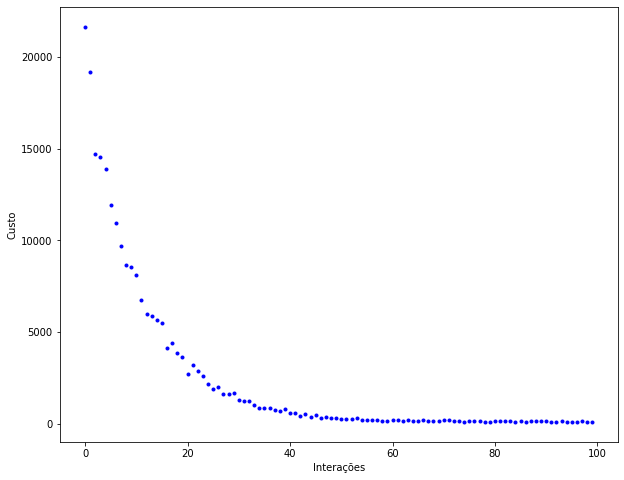

In [57]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Custo')
ax.set_xlabel('Interações')

ax.plot(range(n_iter1),cost_history1,'b.');

In [58]:
lr =0.001 #Definindo a taxa de aprendizagem
n_iter2 = 100 #Definindo número de interações

theta = np.random.randn(2,1) #Gerando o teta(pesos) randomicamente

X_b = np.c_[np.ones((len(X),1)),X]#Criando uma matriz de 1's para fazer a multiplicação com o peso w0
theta,cost_history2 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter2)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history2[-1]))

Theta0:          0.172
Theta1:          0.137
Final cost/MSE:  121.321


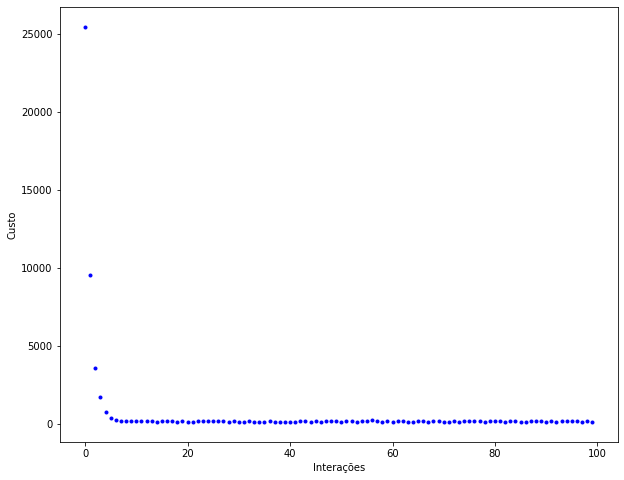

In [59]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Custo')
ax.set_xlabel('Interações')


ax.plot(range(n_iter2),cost_history2,'b.');

In [60]:
lr =0.0003 #Definindo taxa de aprendizagem
n_iter3 = 100 #Definindo número de interações

theta = np.random.randn(2,1) #Gerando o teta(pesos) randomicamente

X_b = np.c_[np.ones((len(X),1)),X]#Criando uma matriz de 1's para fazer a multiplicação com o peso w0
theta,cost_history3 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter3)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history3[-1]))

Theta0:          1.748
Theta1:          0.069
Final cost/MSE:  132.452


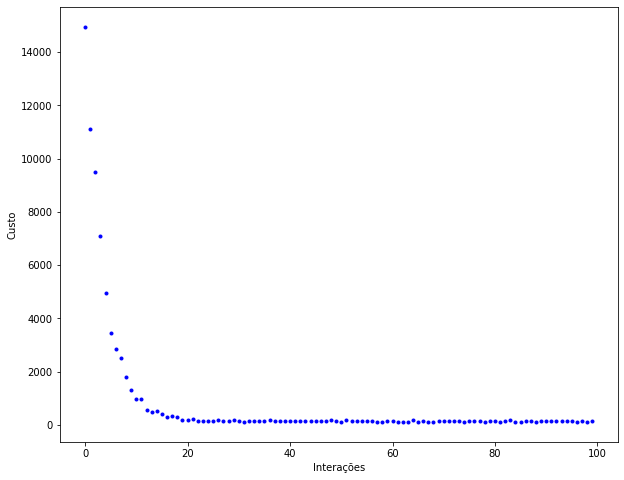

In [61]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Custo')
ax.set_xlabel('Interações')

ax.plot(range(n_iter3),cost_history3,'b.');

# PARTE 2 - Regressão Linear Múltipla
Considere o conjunto de dados disponibilizado neste link. Os dados referem-se às casas encontradas em um determinado distrito da Califórnia e a algumas estatísticas resumidas sobre elas com base nos dados do censo de 1990. Considere que haja um problema de regressão no qual desejamos criar um modelo que faça a predição do valor mediano das casas de um distrito ('median_house_value') com base em outras informações. Crie pelo menos 3 modelos que façam essa predição utilizando mais de uma variável de entrada e compare a diferença de MSE. Qual o melhor modelo encontrado? Justifique a escolha das variáveis.

In [62]:
df_house = pd.read_csv('california_housing_train.csv')
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [63]:
df_house.describe();

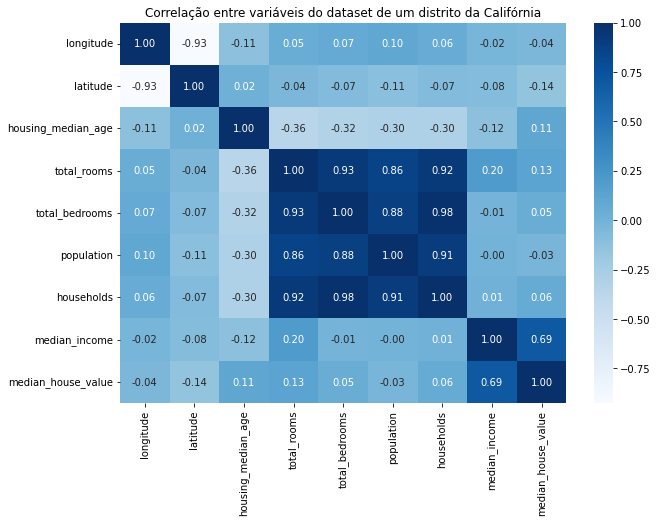

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(df_house.corr(),
            annot = True,
            fmt = '.2f',#deixando em duas casas decimais
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de um distrito da Califórnia')
plt.show()

### Modelo 1
No primeiro modelo escolhido, as features de entrada serão: 'media_income' e 'hounsing_median_age' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.

In [65]:
X = df_house[['median_income','housing_median_age']]
y = df_house['median_house_value']

In [66]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)
# Construindo a predição do modelo
y_pred_model = model.predict(X)

In [67]:
#Erro médio quadrático

print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
print('Raiz do erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y,squared=False))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X, y))

Erro médio quadrático: 6535814191.46
Raiz do erro médio quadrático: 80844.38
Coeficiente de interceptação(Peso w0): -11131.3643
Coeficiente de inclinação(Peso w1):  [43389.52463  1746.30287]
Coeficiente de determinação: 0.5141179623105907


### Modelo 2
Aqui utilizarei todas as features possíveis como entrada para ver o comportamento do modelo com todas elas como entrada.
Obviamente, tendo como saída a predição valor mediano das casas de um distrito ('median_house_value').


In [68]:
X = df_house.drop(['median_house_value'], axis = 1) 
y = df_house.median_house_value #Definindo somente a 'median_house_value' como saída
X;

In [69]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)
# Construindo a predição do modelo
y_pred_model = model.predict(X)

In [70]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
print('Raiz do erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y,squared=False))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X, y))

Erro médio quadrático: 4824523173.93
Coeficiente de interceptação(Peso w0): -3620600.8930
Coeficiente de inclinação(Peso w1):  [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825000e+00
  1.17648540e+02 -3.84887700e+01  4.54360000e+01  4.05070684e+04]
Coeficiente de determinação: 0.6413378529502689


### Modelo 3
Aplicando o Recursive Feature Elimination - RFE para definição das features escolhidas:
- O RFE constrói modelos à partir da remoções de features
- Utiliza a acurácia do modelo para identificar atributos ou a combinação destes que melhor contribui para se ter uma melhor perfomance 
- Em grandes bases de dados o tempo de processamento pode ser um problema 

In [71]:
from sklearn.feature_selection import RFE
X = df_house.drop(['median_house_value'], axis = 1)
y = df_house.median_house_value
X;
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4) #Definindo a quantidade de atributos(features) que devem ser selecionadas pelo RFE e também a instanciação, no caso o model(regressão linear)

In [72]:
fit = rfe.fit(X,y) #Entregando os dados para o rfe, que vai fazer a criação do modelo e fazer os testes levando em consideração, a acurácia. Definindo isso tudo na variável fit

In [73]:
print("Número de features escolhidas: {}".format(fit.n_features_))

Número de features escolhidas: 4


In [74]:
colunas = fit.get_support(indices=True) 
df_house.iloc[:,colunas] #imprimindo o df_house trazendo as features que o método RFE considera como as melhores

,longitude,latitude,housing_median_age,median_income
0,-114.31,34.19,15.0,1.4936
1,-114.47,34.40,19.0,1.8200
2,-114.56,33.69,17.0,1.6509
3,-114.57,33.64,14.0,3.1917
4,-114.57,33.57,20.0,1.9250
...,...,...,...,...
16995,-124.26,40.58,52.0,2.3571
16996,-124.27,40.69,36.0,2.5179
16997,-124.30,41.84,17.0,3.0313
16998,-124.30,41.80,19.0,1.9797


In [75]:
# Redefinindo as entradas à partir da filtragem com o RFE
X = df_house.iloc[:,colunas]
y = df_house['median_house_value']

In [76]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)
# Construindo a predição do modelo
y_pred_model = model.predict(X)

In [77]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X, y))

Erro médio quadrático: 5406096300.11
Coeficiente de interceptação(Peso w0): -3791572.4718
Coeficiente de inclinação(Peso w1):  [-45241.04705 -44497.77956    953.27001  38044.41152]
Coeficiente de determinação: 0.5981028515659096


##### Tendo como base, o erro quadrático médio e o coeficiente de determinação como complemento, o modelo que apresentou o melhor resultado, foi o Modelo 2, em que utilizei como entrada, todas as features disponíveis (comentar sobre isso). A sequência, ficou:
##### 1. Modelo 2 
##### 2. Modelo 3
##### 3. Modelo 1

# PARTE 3 - Regressão Polinomial
Considerando o mesmo problema tratado na Parte 2, treine modelos de regressão utilizando transformações não-lineares dos atributos (x², x³, etc...). Pode-se utilizar transformações em um ou mais atributos. Treine pelo menos 3 modelos diferentes e faça o plot das curvas de regressão comparada com o scatterplot (análogo ao que foi feito na questão 5 da Parte 1). Calcule o MSE para cada um dos modelos. Qual modelo se ajustou melhor aos dados em termos de MSE?


### Modelo 1
Utilizarei como entradas, as features: 'media_income' e 'hounsing_median_age' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.


In [78]:
X = df_house[['median_income','housing_median_age']]
y = df_house['median_house_value']

X_poly = np.hstack((X,X**2,X**3))

model = LinearRegression()

model.fit(X_poly,y)

y_pred_model = model.predict(X_poly)

#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X_poly, y))

Erro médio quadrático: 6272560971.92
Coeficiente de interceptação(Peso w0): -5354.829441326321
Coeficiente de inclinação(Peso w1):  [ 1.82512279e+04  5.44772642e+03  6.05165255e+03 -1.72856200e+02
 -3.70943180e+02  2.23936000e+00]
Coeficiente de determinação: 0.5336885937561535


### Modelo 2
Utilizarei como entradas, as features que com a aplicação do método RFE, foram consideradas melhores, sendo elas: 'longitude','latitude','housing_median_age','median_income'

In [79]:
# Redefinindo as entradas à partir da filtragem com o RFE
X = df_house.iloc[:,colunas]
y = df_house['median_house_value']
X_poly = np.hstack((X,X**2,X**3))

model = LinearRegression()

model.fit(X_poly,y)

y_pred_model = model.predict(X_poly)

#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X_poly, y))

Erro médio quadrático: 5113703578.26
Coeficiente de interceptação(Peso w0): 873600528.1546502
Coeficiente de inclinação(Peso w1):  [ 2.28375953e+07  2.23089642e+06  4.83220740e+03  4.68405219e+03
  1.92994576e+05 -6.46935756e+04 -1.96505030e+02  6.97399820e+03
  5.42288240e+02  6.09926490e+02  2.64548000e+00 -3.87345460e+02]
Coeficiente de determinação: 0.6198397564620397


### Modelo 3
No primeiro modelo escolhido, a feature de entrada será: 'media_income'

In [80]:
X = df_house['median_income'].values.reshape(-1,1)
y = df_house['median_house_value'].values.reshape(-1,1)

X_poly = np.hstack((X,X**2,X**3))

model = LinearRegression()

model.fit(X_poly,y)

y_pred_model = model.predict(X_poly)

#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X_poly, y))



Erro médio quadrático: 6844400238.89
Coeficiente de interceptação(Peso w0): [75138.94311659]
Coeficiente de inclinação(Peso w1):  [[15095.08877  6050.3056   -353.91044]]
Coeficiente de determinação: 0.49117722177908874


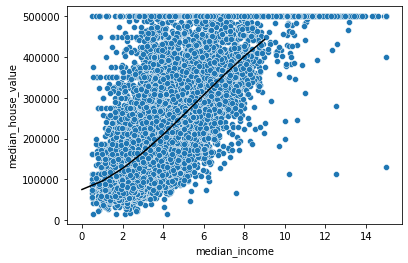

In [81]:
sns.scatterplot(x='median_income', y='median_house_value', data=df_house)
x = np.arange(0,10).reshape(-1,1)
x = np.hstack((x,x**2,x**3))
y_pred_model = model.predict(x).flatten()
plt.plot(np.arange(0,10), y_pred_model, color='black');

##### Tendo como base, o erro quadrático médio e o coeficiente de determinação como complemento, o modelo que apresentou o melhor resultado, foi o Modelo 2, em que utilizei como entrada,as features que com a aplicação do método RFE, foram consideradas melhores, sendo elas: 'longitude','latitude','housing_median_age','median_income'. A sequência, ficou:
##### 1. Modelo 2 
##### 2. Modelo 1
##### 3. Modelo 3

# Parte 4 - Generalização, regularização e normalização
Considere o conjunto de dados utilizado nas partes 2 e 3 de preços de casas na Califórnia. Data de entrega: 04/12

Utilizando um método da validação cruzada (conjuntos de treino, validação e teste) experimente diferentes métodos de: 
- engenharia de atributos (seleção de atributos, atributos polinomiais, normalização)  
- escolha de hiperparâmetros (passo de aprendizagem, coeficiente de regularização, número de iterações) 

Treine no conjunto de treino e avalie no conjunto de validação. Avalie pelo menos 5 abordagens candidatas. 

Ao final, avalie como o seu melhor modelo performa no conjunto de teste e apresente o resultado.

Dica¹: utilize as classes SGDRegressor ou Ridge do scikitlearn.

Dica²: normalize os dados de entrada e saída

Dica³: tente utilizar grid search e/ou k-fold

In [39]:
df_house = pd.read_csv('california_housing_train.csv')
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


### Modelo 1
Utilizarei como entradas, as features: 'media_income' e 'hounsing_median_age' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.

As características de cada modelo serão apresentadas no decorrer de sua construção.

In [40]:
#Importando do sciki-learn os métodos voltados para regressão
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
X = df_house[['median_income','housing_median_age']]
y = df_house['median_house_value'].to_numpy().reshape(-1,1)

In [43]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2,)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 2)
Teste: (3400, 2)
Somente Treino (10880, 2)
Somente Validação: (2720, 2)


Normalizando os dados de treino e validação

- Dimensionador Mín-Máx

In [50]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train)
x_val_norm = scaler.fit_transform(x_val)
y_train_norm = scaler.fit_transform(y_train)
y_val_norm = scaler.fit_transform(y_val)

In [69]:
#Outra maneira de fazer a normalização Min Max utilizando uma função que faz o cálculo diretamente
def normalize(x):
    return ((x - min(x)) / (max(x) - min(x)))

In [123]:
#Definindo alguns hiperparâmetros para o modelo
#eta0: A taxa de aprendizagem inicial para os planejamentos "constante", "escalonamento" ou "adaptativo". O valor padrão é 0,01.
#alpha: Constante que multiplica o prazo de regularização. Quanto maior o valor, mais forte é a regularização. Também usado para calcular a taxa de aprendizagem quando definido como learning_rate é definido como ‘ideal’.
#O SGDRegressor já tem como default a regularização L2
model = SGDRegressor(alpha=0.0001, eta0=0.1)
model.fit(x_train_norm,y_train_norm)
y_pred = model.predict(x_val_norm).reshape(-1,1)

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [124]:
#Trazendo novamente para a escala original dos dados
y_pred_real = scaler.inverse_transform(y_pred)

In [125]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_val,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(x_train_norm, y_train_norm))


Erro médio quadrático: 6637153742.94
Coeficiente de interceptação(Peso w0): [-0.00730394]
Coeficiente de inclinação(Peso w1):  [1.28505 0.18408]
Coeficiente de determinação: 0.5194263546710198


### Modelo 2

Aqui utilizarei todas as features possíveis como entrada para ver o comportamento do modelo com todas elas como entrada. Obviamente, tendo como saída a predição valor mediano das casas de um distrito ('median_house_value').

As características de cada modelo serão apresentadas no decorrer de sua construção.

In [129]:
X = df_house.drop(['median_house_value'], axis = 1) 
y = df_house.median_house_value.to_numpy().reshape(-1,1) #Definindo somente a 'median_house_value' como saída

In [130]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2,)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 8)
Teste: (3400, 8)
Somente Treino (10880, 8)
Somente Validação: (2720, 8)


In [131]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train)
x_val_norm = scaler.fit_transform(x_val)
y_train_norm = scaler.fit_transform(y_train)
y_val_norm = scaler.fit_transform(y_val)

In [133]:
model2 = SGDRegressor()
#Olhando os parâmetros do SGDRegressor 
model2.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [142]:
# Definindo os parâmetros que serão utilizados no GridSearchCV
model2_params = {
    #Utilizando essa potenciação pra deixar o alpha sempre naquela vibe de taxa mesmo, só que dando esse intervalo para o gread trabalhar
    #O restante dos parâmetros foram definidos de acordo com a documentação
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}

In [143]:
from sklearn.model_selection import GridSearchCV
# Definir uma lista de métricas, sendo a mais importante a do erro quadrático == neg_mean_squared_log_error
# Link das métricas: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
metricas = ['explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'r2']
#  verbose=100 pra ele ir falando o que ele tá fazendo passo a passo
# No refit significa que ele vai escolher o modelo com o menor erro quadrado médio. Por último estou pedindo para não retornar os scores de treinamento.
meu_primeiro_grid = GridSearchCV(model2, param_grid=model2_params, scoring=metricas, verbose=100, refit='neg_mean_squared_error', return_train_score=False)

In [144]:
meu_primeiro_grid.fit(x_train_norm,y_train_norm)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5; 1/162] START alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l2
[CV 1/5; 1/162] END alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l2; explained_variance: (test=0.160) neg_mean_absolute_error: (test=-0.177) neg_mean_squared_error: (test=-0.048) neg_mean_squared_log_error: (test=-0.022) neg_median_absolute_error: (test=-0.157) r2: (test=0.155) total time=   0.0s
[CV 2/5; 1/162] START alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l2
[CV 2/5; 1/162] END alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l2; explained_variance: (test=0.168) neg_mean_absolute_error: (test=-0.181) neg_mean_squared_error: (test=-0.050) neg_mean_squared_log_error: (test=-0.023) neg_median_absolute_error: (test=-0.158) r2: (test=0.161) total time=   0.0s
[CV 3/5; 1/162] START alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l2
[CV 3/5; 1/162] END alpha=0.1, learning_rate=c

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 1/5; 6/162] END alpha=0.1, learning_rate=constant, loss=huber, penalty=elasticnet; explained_variance: (test=0.000) neg_mean_absolute_error: (test=-0.183) neg_mean_squared_error: (test=-0.058) neg_mean_squared_log_error: (test=-0.026) neg_median_absolute_error: (test=-0.150) r2: (test=-0.029) total time=   0.0s
[CV 2/5; 6/162] START alpha=0.1, learning_rate=constant, loss=huber, penalty=elasticnet
[CV 2/5; 6/162] END alpha=0.1, learning_rate=constant, loss=huber, penalty=elasticnet; explained_variance: (test=0.000) neg_mean_absolute_error: (test=-0.187) neg_mean_squared_error: (test=-0.063) neg_mean_squared_log_error: (test=-0.028) neg_median_absolute_error: (test=-0.146) r2: (test=-0.053) total time=   0.0s
[CV 3/5; 6/162] START alpha=0.1, learning_rate=constant, loss=huber, penalty=elasticnet
[CV 3/5; 6/162] END alpha=0.1, learning_rate=constant, loss=huber, penalty=elasticnet; explained_variance: (test=0.000) neg_mean_absolute_error: (test=-0.183) neg_mean_squared_error: (test=-

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 5/5; 10/162] END alpha=0.1, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=0.164) neg_mean_absolute_error: (test=-0.173) neg_mean_squared_error: (test=-0.048) neg_mean_squared_log_error: (test=-0.022) neg_median_absolute_error: (test=-0.147) r2: (test=0.164) total time=   0.0s
[CV 1/5; 11/162] START alpha=0.1, learning_rate=optimal, loss=squared_loss, penalty=l1
[CV 1/5; 11/162] END alpha=0.1, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=0.000) neg_mean_absolute_error: (test=-0.189) neg_mean_squared_error: (test=-0.056) neg_mean_squared_log_error: (test=-0.026) neg_median_absolute_error: (test=-0.160) r2: (test=-0.000) total time=   0.0s
[CV 2/5; 11/162] START alpha=0.1, learning_rate=optimal, loss=squared_loss, penalty=l1
[CV 2/5; 11/162] END alpha=0.1, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=0.000) neg_mean_absolute_error: (test=-0.193) neg_mean_squared_error: (test=-0.060)

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 2/5; 16/162] END alpha=0.1, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=0.358) neg_mean_absolute_error: (test=-0.148) neg_mean_squared_error: (test=-0.039) neg_mean_squared_log_error: (test=-0.017) neg_median_absolute_error: (test=-0.116) r2: (test=0.339) total time=   0.0s
[CV 3/5; 16/162] START alpha=0.1, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2
[CV 3/5; 16/162] END alpha=0.1, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=0.379) neg_mean_absolute_error: (test=-0.144) neg_mean_squared_error: (test=-0.036) neg_mean_squared_log_error: (test=-0.016) neg_median_absolute_error: (test=-0.114) r2: (test=0.364) total time=   0.0s
[CV 4/5; 16/162] START alpha=0.1, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2
[CV 4/5; 16/162] END alpha=0.1, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=0.362) neg_mean_absolute_error: (test=-0.146) neg

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 5/5; 20/162] END alpha=0.1, learning_rate=invscaling, loss=squared_loss, penalty=l1; explained_variance: (test=-0.000) neg_mean_absolute_error: (test=-0.188) neg_mean_squared_error: (test=-0.057) neg_mean_squared_log_error: (test=-0.026) neg_median_absolute_error: (test=-0.155) r2: (test=-0.000) total time=   0.0s
[CV 1/5; 21/162] START alpha=0.1, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet
[CV 1/5; 21/162] END alpha=0.1, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet; explained_variance: (test=0.053) neg_mean_absolute_error: (test=-0.184) neg_mean_squared_error: (test=-0.053) neg_mean_squared_log_error: (test=-0.025) neg_median_absolute_error: (test=-0.158) r2: (test=0.053) total time=   0.0s
[CV 2/5; 21/162] START alpha=0.1, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet
[CV 2/5; 21/162] END alpha=0.1, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet; explained_variance: (test=0.050) neg_mean_absolute_error: (te

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 1/5; 25/162] END alpha=0.1, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=0.364) neg_mean_absolute_error: (test=-0.146) neg_mean_squared_error: (test=-0.036) neg_mean_squared_log_error: (test=-0.016) neg_median_absolute_error: (test=-0.122) r2: (test=0.358) total time=   0.0s
[CV 2/5; 25/162] START alpha=0.1, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2
[CV 2/5; 25/162] END alpha=0.1, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=0.358) neg_mean_absolute_error: (test=-0.148) neg_mean_squared_error: (test=-0.039) neg_mean_squared_log_error: (test=-0.017) neg_median_absolute_error: (test=-0.117) r2: (test=0.341) total time=   0.0s
[CV 3/5; 25/162] START alpha=0.1, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2
[CV 3/5; 25/162] END alpha=0.1, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=0.377) neg_mean_absolute_error: (t

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 3/5; 29/162] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=l1; explained_variance: (test=0.401) neg_mean_absolute_error: (test=-0.142) neg_mean_squared_error: (test=-0.034) neg_mean_squared_log_error: (test=-0.016) neg_median_absolute_error: (test=-0.118) r2: (test=0.397) total time=   0.0s
[CV 4/5; 29/162] START alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=l1
[CV 4/5; 29/162] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=l1; explained_variance: (test=0.373) neg_mean_absolute_error: (test=-0.143) neg_mean_squared_error: (test=-0.037) neg_mean_squared_log_error: (test=-0.017) neg_median_absolute_error: (test=-0.113) r2: (test=0.360) total time=   0.0s
[CV 5/5; 29/162] START alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=l1
[CV 5/5; 29/162] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=l1; explained_variance: (test=0.403) neg_mean_absolute_error: (test=-0.145) neg_mean_squared_error: (tes

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 2/5; 34/162] END alpha=0.01, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=0.587) neg_mean_absolute_error: (test=-0.115) neg_mean_squared_error: (test=-0.025) neg_mean_squared_log_error: (test=-0.011) neg_median_absolute_error: (test=-0.091) r2: (test=0.587) total time=   0.0s
[CV 3/5; 34/162] START alpha=0.01, learning_rate=constant, loss=epsilon_insensitive, penalty=l2
[CV 3/5; 34/162] END alpha=0.01, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 34/162] START alpha=0.01, learning_rate=constant, loss=epsilon_insensitive, penalty=l2
[CV 4/5; 34/162] END alpha=0.01, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squar

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 1/5; 37/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 2/5; 37/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 2/5; 37/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 3/5; 37/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 3/5; 37/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 4/5; 37/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 4/5; 37/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 5/5; 37/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 5/5; 37/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 1/5; 38/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 1/5; 38/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 2/5; 38/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 2/5; 38/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 3/5; 38/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 3/5; 38/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 4/5; 38/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 4/5; 38/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 5/5; 38/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 5/5; 38/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 1/5; 39/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 1/5; 39/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 2/5; 39/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 2/5; 39/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 3/5; 39/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 3/5; 39/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 4/5; 39/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 4/5; 39/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 5/5; 39/162] START alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 5/5; 39/162] END alpha=0.01, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 1/5; 40/162] START alpha=0.01, learning_rate=optimal, loss=huber, penalty=l2
[CV 1/5; 40/162] END alpha=0.01, learning_rate=optimal, loss=huber, penalty=l2; explained_variance: (test=0.386) neg_mean_absolute_error: (test=-0.141) neg_mean_squared_error: (test=-0.037) neg_mean_squared_log_error: (test=-0.016) neg_median_absolute_error: (test=-0.106) r2: (test=0.344) total time=   0.0s
[CV 2/5; 40/162] START alpha=0.01, learning_rate=optimal, loss=huber, penalty=l2
[CV 2/5; 40/162] END alpha=0.01, learning_rate=optimal, loss=huber, penalty=l2; explained_variance: (test=0.380) neg_mean_absolute_error: (test=-0.144) neg_mean_squared_error: (test=-0.039) neg_mean_squared_log_error: (te

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 1/5; 45/162] END alpha=0.01, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 45/162] START alpha=0.01, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet
[CV 2/5; 45/162] END alpha=0.01, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=0.577) neg_mean_absolute_error: (test=-0.113) neg_mean_squared_error: (test=-0.025) neg_mean_squared_log_error: (test=-0.011) neg_median_absolute_error: (test=-0.087) r2: (test=0.573) total time=   0.0s
[CV 3/5; 45/162] START alpha=0.01, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet
[CV 3/5; 45/162] END alpha=0.01, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=0.606) neg_mean_abso

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 1/5; 49/162] END alpha=0.01, learning_rate=invscaling, loss=huber, penalty=l2; explained_variance: (test=0.222) neg_mean_absolute_error: (test=-0.161) neg_mean_squared_error: (test=-0.046) neg_mean_squared_log_error: (test=-0.020) neg_median_absolute_error: (test=-0.127) r2: (test=0.185) total time=   0.0s
[CV 2/5; 49/162] START alpha=0.01, learning_rate=invscaling, loss=huber, penalty=l2
[CV 2/5; 49/162] END alpha=0.01, learning_rate=invscaling, loss=huber, penalty=l2; explained_variance: (test=0.220) neg_mean_absolute_error: (test=-0.164) neg_mean_squared_error: (test=-0.049) neg_mean_squared_log_error: (test=-0.021) neg_median_absolute_error: (test=-0.126) r2: (test=0.175) total time=   0.0s
[CV 3/5; 49/162] START alpha=0.01, learning_rate=invscaling, loss=huber, penalty=l2
[CV 3/5; 49/162] END alpha=0.01, learning_rate=invscaling, loss=huber, penalty=l2; explained_variance: (test=0.230) neg_mean_absolute_error: (test=-0.161) neg_mean_squared_error: (test=-0.046) neg_mean_square

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 5/5; 52/162] END alpha=0.01, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=0.611) neg_mean_absolute_error: (test=-0.110) neg_mean_squared_error: (test=-0.022) neg_mean_squared_log_error: (test=-0.010) neg_median_absolute_error: (test=-0.086) r2: (test=0.610) total time=   0.0s
[CV 1/5; 53/162] START alpha=0.01, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l1
[CV 1/5; 53/162] END alpha=0.01, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=0.527) neg_mean_absolute_error: (test=-0.121) neg_mean_squared_error: (test=-0.027) neg_mean_squared_log_error: (test=-0.012) neg_median_absolute_error: (test=-0.094) r2: (test=0.520) total time=   0.0s
[CV 2/5; 53/162] START alpha=0.01, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l1
[CV 2/5; 53/162] END alpha=0.01, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=0.528) neg_mean_absolute_erro

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 4/5; 56/162] END alpha=0.001, learning_rate=constant, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 56/162] START alpha=0.001, learning_rate=constant, loss=squared_loss, penalty=l1
[CV 5/5; 56/162] END alpha=0.001, learning_rate=constant, loss=squared_loss, penalty=l1; explained_variance: (test=0.619) neg_mean_absolute_error: (test=-0.109) neg_mean_squared_error: (test=-0.022) neg_mean_squared_log_error: (test=-0.010) neg_median_absolute_error: (test=-0.087) r2: (test=0.618) total time=   0.0s
[CV 1/5; 57/162] START alpha=0.001, learning_rate=constant, loss=squared_loss, penalty=elasticnet
[CV 1/5; 57/162] END alpha=0.001, learning_rate=constant, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (tes

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 1/5; 61/162] END alpha=0.001, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 61/162] START alpha=0.001, learning_rate=constant, loss=epsilon_insensitive, penalty=l2
[CV 2/5; 61/162] END alpha=0.001, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 61/162] START alpha=0.001, learning_rate=constant, loss=epsilon_insensitive, penalty=l2
[CV 3/5; 61/162] END alpha=0.001, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 1/5; 64/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 2/5; 64/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 2/5; 64/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 3/5; 64/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 3/5; 64/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 4/5; 64/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 4/5; 64/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 5/5; 64/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 5/5; 64/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 1/5; 65/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 1/5; 65/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 2/5; 65/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 2/5; 65/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 3/5; 65/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 3/5; 65/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 4/5; 65/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 4/5; 65/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 5/5; 65/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 5/5; 65/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 1/5; 66/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 1/5; 66/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 2/5; 66/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 2/5; 66/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 3/5; 66/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 3/5; 66/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 4/5; 66/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 4/5; 66/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 5/5; 66/162] START alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 5/5; 66/162] END alpha=0.001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 1/5; 67/162] START alpha=0.001, learning_rate=optimal, loss=huber, penalty=l2
[CV 1/5; 67/162] END alpha=0.001, learning_rate=optimal, loss=huber, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 67/162] START alpha=0.001, learning_rate=optimal, loss=huber, penalty=l2
[CV 2/5; 67/162] END alpha=0.001, learning_rate=optimal, loss=huber, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 2/5; 71/162] END alpha=0.001, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 71/162] START alpha=0.001, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1
[CV 3/5; 71/162] END alpha=0.001, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 71/162] START alpha=0.001, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1
[CV 4/5; 71/162] END alpha=0.001, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 5/5; 74/162] END alpha=0.001, learning_rate=invscaling, loss=squared_loss, penalty=l1; explained_variance: (test=0.499) neg_mean_absolute_error: (test=-0.131) neg_mean_squared_error: (test=-0.029) neg_mean_squared_log_error: (test=-0.013) neg_median_absolute_error: (test=-0.111) r2: (test=0.499) total time=   0.0s
[CV 1/5; 75/162] START alpha=0.001, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet
[CV 1/5; 75/162] END alpha=0.001, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet; explained_variance: (test=0.502) neg_mean_absolute_error: (test=-0.130) neg_mean_squared_error: (test=-0.028) neg_mean_squared_log_error: (test=-0.013) neg_median_absolute_error: (test=-0.111) r2: (test=0.502) total time=   0.0s
[CV 2/5; 75/162] START alpha=0.001, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet
[CV 2/5; 75/162] END alpha=0.001, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet; explained_variance: (test=0.498) neg_mean_absolute_er

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 5/5; 78/162] END alpha=0.001, learning_rate=invscaling, loss=huber, penalty=elasticnet; explained_variance: (test=0.267) neg_mean_absolute_error: (test=-0.157) neg_mean_squared_error: (test=-0.044) neg_mean_squared_log_error: (test=-0.019) neg_median_absolute_error: (test=-0.118) r2: (test=0.229) total time=   0.0s
[CV 1/5; 79/162] START alpha=0.001, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2
[CV 1/5; 79/162] END alpha=0.001, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 79/162] START alpha=0.001, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2
[CV 2/5; 79/162] END alpha=0.001, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_m

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 3/5; 82/162] END alpha=0.0001, learning_rate=constant, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 82/162] START alpha=0.0001, learning_rate=constant, loss=squared_loss, penalty=l2
[CV 4/5; 82/162] END alpha=0.0001, learning_rate=constant, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 82/162] START alpha=0.0001, learning_rate=constant, loss=squared_loss, penalty=l2
[CV 5/5; 82/162] END alpha=0.0001, learning_rate=constant, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 1/5; 86/162] END alpha=0.0001, learning_rate=constant, loss=huber, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 86/162] START alpha=0.0001, learning_rate=constant, loss=huber, penalty=l1
[CV 2/5; 86/162] END alpha=0.0001, learning_rate=constant, loss=huber, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 86/162] START alpha=0.0001, learning_rate=constant, loss=huber, penalty=l1
[CV 3/5; 86/162] END alpha=0.0001, learning_rate=constant, loss=huber, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absol

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 3/5; 90/162] END alpha=0.0001, learning_rate=constant, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 90/162] START alpha=0.0001, learning_rate=constant, loss=epsilon_insensitive, penalty=elasticnet
[CV 4/5; 90/162] END alpha=0.0001, learning_rate=constant, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 90/162] START alpha=0.0001, learning_rate=constant, loss=epsilon_insensitive, penalty=elasticnet
[CV 5/5; 90/162] END alpha=0.0001, learning_rate=constant, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolut

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 1/5; 91/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 2/5; 91/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 2/5; 91/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 3/5; 91/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 3/5; 91/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 4/5; 91/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 4/5; 91/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 5/5; 91/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 5/5; 91/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.3s
[CV 1/5; 92/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 1/5; 92/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 2/5; 92/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 2/5; 92/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 3/5; 92/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 3/5; 92/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 4/5; 92/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1
[CV 4/5; 92/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 5/5; 92/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 5/5; 92/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 1/5; 93/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 1/5; 93/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 2/5; 93/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 2/5; 93/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 3/5; 93/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 3/5; 93/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.6s
[CV 4/5; 93/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 4/5; 93/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.6s
[CV 5/5; 93/162] START alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python

[CV 5/5; 93/162] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.5s
[CV 1/5; 94/162] START alpha=0.0001, learning_rate=optimal, loss=huber, penalty=l2
[CV 1/5; 94/162] END alpha=0.0001, learning_rate=optimal, loss=huber, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 94/162] START alpha=0.0001, learning_rate=optimal, loss=huber, penalty=l2
[CV 2/5; 94/162] END alpha=0.0001, learning_rate=optimal, loss=huber, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_me

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 4/5; 97/162] END alpha=0.0001, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 97/162] START alpha=0.0001, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2
[CV 5/5; 97/162] END alpha=0.0001, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 98/162] START alpha=0.0001, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1
[CV 1/5; 98/162] END alpha=0.0001, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 3/5; 99/162] END alpha=0.0001, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 99/162] START alpha=0.0001, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet
[CV 4/5; 99/162] END alpha=0.0001, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 99/162] START alpha=0.0001, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet
[CV 5/5; 99/162] END alpha=0.0001, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_err

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 3/5; 102/162] END alpha=0.0001, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet; explained_variance: (test=0.532) neg_mean_absolute_error: (test=-0.127) neg_mean_squared_error: (test=-0.027) neg_mean_squared_log_error: (test=-0.012) neg_median_absolute_error: (test=-0.107) r2: (test=0.531) total time=   0.0s
[CV 4/5; 102/162] START alpha=0.0001, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet
[CV 4/5; 102/162] END alpha=0.0001, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet; explained_variance: (test=0.505) neg_mean_absolute_error: (test=-0.129) neg_mean_squared_error: (test=-0.029) neg_mean_squared_log_error: (test=-0.013) neg_median_absolute_error: (test=-0.106) r2: (test=0.505) total time=   0.0s
[CV 5/5; 102/162] START alpha=0.0001, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet
[CV 5/5; 102/162] END alpha=0.0001, learning_rate=invscaling, loss=squared_loss, penalty=elasticnet; explained_variance: (test=0.535) ne

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 4/5; 106/162] END alpha=0.0001, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 106/162] START alpha=0.0001, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2
[CV 5/5; 106/162] END alpha=0.0001, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 107/162] START alpha=0.0001, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l1
[CV 1/5; 107/162] END alpha=0.0001, learning_rate=invscaling, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_m

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 5/5; 110/162] END alpha=1e-05, learning_rate=constant, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 111/162] START alpha=1e-05, learning_rate=constant, loss=squared_loss, penalty=elasticnet
[CV 1/5; 111/162] END alpha=1e-05, learning_rate=constant, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 111/162] START alpha=1e-05, learning_rate=constant, loss=squared_loss, penalty=elasticnet
[CV 2/5; 111/162] END alpha=1e-05, learning_rate=constant, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error:

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 4/5; 115/162] END alpha=1e-05, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 115/162] START alpha=1e-05, learning_rate=constant, loss=epsilon_insensitive, penalty=l2
[CV 5/5; 115/162] END alpha=1e-05, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 116/162] START alpha=1e-05, learning_rate=constant, loss=epsilon_insensitive, penalty=l1
[CV 1/5; 116/162] END alpha=1e-05, learning_rate=constant, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_err

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 2/5; 118/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 118/162] START alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l2
[CV 3/5; 118/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 118/162] START alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l2
[CV 4/5; 118/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_erro

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 1/5; 119/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 119/162] START alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l1
[CV 2/5; 119/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 119/162] START alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 3/5; 119/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 119/162] START alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l1
[CV 4/5; 119/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 119/162] START alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l1
[CV 5/5; 119/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_erro

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 1/5; 120/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 120/162] START alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet
[CV 2/5; 120/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 120/162] START alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet
[CV 3/5; 120/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_err

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 4/5; 120/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 120/162] START alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet
[CV 5/5; 120/162] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 121/162] START alpha=1e-05, learning_rate=optimal, loss=huber, penalty=l2
[CV 1/5; 121/162] END alpha=1e-05, learning_rate=optimal, loss=huber, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_square

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 3/5; 122/162] END alpha=1e-05, learning_rate=optimal, loss=huber, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 122/162] START alpha=1e-05, learning_rate=optimal, loss=huber, penalty=l1
[CV 4/5; 122/162] END alpha=1e-05, learning_rate=optimal, loss=huber, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 122/162] START alpha=1e-05, learning_rate=optimal, loss=huber, penalty=l1
[CV 5/5; 122/162] END alpha=1e-05, learning_rate=optimal, loss=huber, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_e

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 2/5; 124/162] END alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 124/162] START alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2
[CV 3/5; 124/162] END alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 124/162] START alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2
[CV 4/5; 124/162] END alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 1/5; 125/162] END alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 125/162] START alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1
[CV 2/5; 125/162] END alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 125/162] START alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1
[CV 3/5; 125/162] END alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 4/5; 125/162] END alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 125/162] START alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1
[CV 5/5; 125/162] END alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 126/162] START alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet
[CV 1/5; 126/162] END alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 3/5; 126/162] END alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 126/162] START alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet
[CV 4/5; 126/162] END alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 126/162] START alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet
[CV 5/5; 126/162] END alpha=1e-05, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_err

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 2/5; 128/162] END alpha=1e-05, learning_rate=invscaling, loss=squared_loss, penalty=l1; explained_variance: (test=0.507) neg_mean_absolute_error: (test=-0.129) neg_mean_squared_error: (test=-0.029) neg_mean_squared_log_error: (test=-0.013) neg_median_absolute_error: (test=-0.105) r2: (test=0.506) total time=   0.0s
[CV 3/5; 128/162] START alpha=1e-05, learning_rate=invscaling, loss=squared_loss, penalty=l1
[CV 3/5; 128/162] END alpha=1e-05, learning_rate=invscaling, loss=squared_loss, penalty=l1; explained_variance: (test=0.532) neg_mean_absolute_error: (test=-0.129) neg_mean_squared_error: (test=-0.027) neg_mean_squared_log_error: (test=-0.013) neg_median_absolute_error: (test=-0.110) r2: (test=0.529) total time=   0.0s
[CV 4/5; 128/162] START alpha=1e-05, learning_rate=invscaling, loss=squared_loss, penalty=l1
[CV 4/5; 128/162] END alpha=1e-05, learning_rate=invscaling, loss=squared_loss, penalty=l1; explained_variance: (test=0.505) neg_mean_absolute_error: (test=-0.128) neg_mean

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 1/5; 132/162] END alpha=1e-05, learning_rate=invscaling, loss=huber, penalty=elasticnet; explained_variance: (test=0.271) neg_mean_absolute_error: (test=-0.156) neg_mean_squared_error: (test=-0.043) neg_mean_squared_log_error: (test=-0.019) neg_median_absolute_error: (test=-0.122) r2: (test=0.233) total time=   0.0s
[CV 2/5; 132/162] START alpha=1e-05, learning_rate=invscaling, loss=huber, penalty=elasticnet
[CV 2/5; 132/162] END alpha=1e-05, learning_rate=invscaling, loss=huber, penalty=elasticnet; explained_variance: (test=0.267) neg_mean_absolute_error: (test=-0.159) neg_mean_squared_error: (test=-0.046) neg_mean_squared_log_error: (test=-0.020) neg_median_absolute_error: (test=-0.122) r2: (test=0.225) total time=   0.0s
[CV 3/5; 132/162] START alpha=1e-05, learning_rate=invscaling, loss=huber, penalty=elasticnet
[CV 3/5; 132/162] END alpha=1e-05, learning_rate=invscaling, loss=huber, penalty=elasticnet; explained_variance: (test=0.280) neg_mean_absolute_error: (test=-0.156) neg

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 3/5; 135/162] END alpha=1e-05, learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 135/162] START alpha=1e-05, learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet
[CV 4/5; 135/162] END alpha=1e-05, learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 135/162] START alpha=1e-05, learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet
[CV 5/5; 135/162] END alpha=1e-05, learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_me

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 2/5; 140/162] END alpha=1e-06, learning_rate=constant, loss=huber, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 140/162] START alpha=1e-06, learning_rate=constant, loss=huber, penalty=l1
[CV 3/5; 140/162] END alpha=1e-06, learning_rate=constant, loss=huber, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 140/162] START alpha=1e-06, learning_rate=constant, loss=huber, penalty=l1
[CV 4/5; 140/162] END alpha=1e-06, learning_rate=constant, loss=huber, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absol

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 5/5; 144/162] END alpha=1e-06, learning_rate=constant, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 145/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l2
[CV 1/5; 145/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=0.628) neg_mean_absolute_error: (test=-0.253) neg_mean_squared_error: (test=-0.078) neg_mean_squared_log_error: (test=-0.037) neg_median_absolute_error: (test=-0.261) r2: (test=-0.388) total time=   0.0s
[CV 2/5; 145/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l2
[CV 2/5; 145/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (te

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 3/5; 145/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 145/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l2
[CV 4/5; 145/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 145/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l2
[CV 5/5; 145/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_erro

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 1/5; 146/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 146/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l1
[CV 2/5; 146/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 146/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 3/5; 146/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 146/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l1
[CV 4/5; 146/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 146/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l1


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 5/5; 146/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 147/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=elasticnet
[CV 1/5; 147/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 147/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 2/5; 147/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 147/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=elasticnet
[CV 3/5; 147/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 147/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 4/5; 147/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 147/162] START alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=elasticnet
[CV 5/5; 147/162] END alpha=1e-06, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 148/162] START alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l2
[CV 1/5; 148/162] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_square

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 5/5; 148/162] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 149/162] START alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l1
[CV 1/5; 149/162] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 149/162] START alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l1
[CV 2/5; 149/162] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_e

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 2/5; 150/162] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 150/162] START alpha=1e-06, learning_rate=optimal, loss=huber, penalty=elasticnet
[CV 3/5; 150/162] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 150/162] START alpha=1e-06, learning_rate=optimal, loss=huber, penalty=elasticnet
[CV 4/5; 150/162] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 1/5; 151/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 151/162] START alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2
[CV 2/5; 151/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 151/162] START alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 3/5; 151/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.1s
[CV 4/5; 151/162] START alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2
[CV 4/5; 151/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 151/162] START alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 5/5; 151/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l2; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 152/162] START alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1
[CV 1/5; 152/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5; 152/162] START alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1
[CV 2/5; 152/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=-0.138) neg_mean_absolute_error: (test=-0.374) neg_mean_squared_er

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 4/5; 152/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 152/162] START alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1
[CV 5/5; 152/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=l1; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 153/162] START alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet
[CV 1/5; 153/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

[CV 2/5; 153/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5; 153/162] START alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet
[CV 3/5; 153/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5; 153/162] START alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet


c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 4/5; 153/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5; 153/162] START alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet
[CV 5/5; 153/162] END alpha=1e-06, learning_rate=optimal, loss=epsilon_insensitive, penalty=elasticnet; explained_variance: (test=nan) neg_mean_absolute_error: (test=nan) neg_mean_squared_error: (test=nan) neg_mean_squared_log_error: (test=nan) neg_median_absolute_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5; 154/162] START alpha=1e-06, learning_rate=invscaling, loss=squared_loss, penalty=l2
[CV 1/5; 154/162] END alpha=1e-06, learning_rate=invscaling, loss=squared_loss, penalty=l2; explained_variance: (test=0.511) neg_mean_absolute_error: (test=-0.128) neg_

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

[CV 1/5; 155/162] END alpha=1e-06, learning_rate=invscaling, loss=squared_loss, penalty=l1; explained_variance: (test=0.511) neg_mean_absolute_error: (test=-0.127) neg_mean_squared_error: (test=-0.028) neg_mean_squared_log_error: (test=-0.012) neg_median_absolute_error: (test=-0.106) r2: (test=0.510) total time=   0.0s
[CV 2/5; 155/162] START alpha=1e-06, learning_rate=invscaling, loss=squared_loss, penalty=l1
[CV 2/5; 155/162] END alpha=1e-06, learning_rate=invscaling, loss=squared_loss, penalty=l1; explained_variance: (test=0.507) neg_mean_absolute_error: (test=-0.130) neg_mean_squared_error: (test=-0.029) neg_mean_squared_log_error: (test=-0.013) neg_median_absolute_error: (test=-0.107) r2: (test=0.507) total time=   0.0s
[CV 3/5; 155/162] START alpha=1e-06, learning_rate=invscaling, loss=squared_loss, penalty=l1
[CV 3/5; 155/162] END alpha=1e-06, learning_rate=invscaling, loss=squared_loss, penalty=l1; explained_variance: (test=0.532) neg_mean_absolute_error: (test=-0.128) neg_mean

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

[CV 5/5; 158/162] END alpha=1e-06, learning_rate=invscaling, loss=huber, penalty=l1; explained_variance: (test=0.276) neg_mean_absolute_error: (test=-0.156) neg_mean_squared_error: (test=-0.044) neg_mean_squared_log_error: (test=-0.019) neg_median_absolute_error: (test=-0.116) r2: (test=0.234) total time=   0.0s
[CV 1/5; 159/162] START alpha=1e-06, learning_rate=invscaling, loss=huber, penalty=elasticnet
[CV 1/5; 159/162] END alpha=1e-06, learning_rate=invscaling, loss=huber, penalty=elasticnet; explained_variance: (test=0.270) neg_mean_absolute_error: (test=-0.156) neg_mean_squared_error: (test=-0.043) neg_mean_squared_log_error: (test=-0.019) neg_median_absolute_error: (test=-0.123) r2: (test=0.240) total time=   0.0s
[CV 2/5; 159/162] START alpha=1e-06, learning_rate=invscaling, loss=huber, penalty=elasticnet
[CV 2/5; 159/162] END alpha=1e-06, learning_rate=invscaling, loss=huber, penalty=elasticnet; explained_variance: (test=0.267) neg_mean_absolute_error: (test=-0.159) neg_mean_sq

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-pac

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             refit='neg_mean_squared_error',
             scoring=['explained_variance', 'neg_mean_absolute_error',
                      'neg_mean_squared_error', 'neg_mean_squared_log_error',
                      'neg_median_absolute_error', 'r2'],
             verbose=100)

In [145]:
meu_primeiro_grid.best_estimator_
#Então os ajustes definidos para os hiperparâmetros após a aplicação do GridSearch, foram esses:

SGDRegressor(alpha=0.001, learning_rate='constant', loss='huber', penalty='l1')

In [163]:
# Como eu defini o neg_mean_squared_error no refit, ele está devolvendo o melhor score dessa métrica. Essa métrica é o erro quadrado médio, só que negativa. 
#Acho que é pra ficar mais fácil de minimizar, aí eles adotam o padrão de colocar as métricas tudo negativa. 
meu_primeiro_grid.best_score_

-0.026526843048847882

In [164]:
# Achei que a melhor forma de lidar com isso é tirando a raiz da métrica(até pelo fato de ser o erro quadrático), após aplicar esse passo, temos o erro.
np.sqrt(meu_primeiro_grid.best_score_*-1)

0.16287063286193704

In [151]:
#  O Grid Search retorna um dicionário com todos os resultados, transformei ele em um dataframe pra ficar mais fácil de ver
pd.DataFrame(meu_primeiro_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_learning_rate,param_loss,param_penalty,params,split0_test_explained_variance,split1_test_explained_variance,split2_test_explained_variance,split3_test_explained_variance,split4_test_explained_variance,mean_test_explained_variance,std_test_explained_variance,rank_test_explained_variance,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_mean_squared_log_error,split1_test_neg_mean_squared_log_error,split2_test_neg_mean_squared_log_error,split3_test_neg_mean_squared_log_error,split4_test_neg_mean_squared_log_error,mean_test_neg_mean_squared_log_error,std_test_neg_mean_squared_log_error,rank_test_neg_mean_squared_log_error,split0_test_neg_median_absolute_error,split1_test_neg_median_absolute_error,split2_test_neg_median_absolute_error,split3_test_neg_median_absolute_error,split4_test_neg_median_absolute_error,mean_test_neg_median_absolute_error,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.004188,0.000398,0.002195,0.000747,0.1,constant,squared_loss,l2,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",1.603408e-01,1.678449e-01,0.171843,1.576575e-01,1.599711e-01,1.635315e-01,5.386179e-03,47,-0.176989,-0.181036,-0.176615,-0.175571,-0.184241,-0.178890,0.003257,52,-0.047713,-0.049997,-0.047712,-0.049053,-0.049450,-0.048785,0.000926,48,-0.022361,-0.023350,-0.022416,-0.022569,-0.023649,-0.022869,0.000528,49,-0.157033,-0.157571,-0.154080,-0.148142,-0.166287,-0.156623,0.005880,67,0.155102,0.160810,0.164964,0.157432,0.130706,0.153803,0.012016,48
1,0.005593,0.000480,0.001977,0.000645,0.1,constant,squared_loss,l1,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",1.110223e-16,0.000000e+00,0.000000,-2.220446e-16,-2.220446e-16,-6.661338e-17,1.332268e-16,63,-0.192237,-0.189996,-0.193129,-0.186255,-0.184878,-0.189299,0.003243,68,-0.056690,-0.059939,-0.057564,-0.058948,-0.057454,-0.058119,0.001165,58,-0.026597,-0.027263,-0.027094,-0.026739,-0.026115,-0.026762,0.000402,59,-0.167190,-0.158041,-0.164329,-0.150927,-0.148370,-0.157771,0.007308,68,-0.003859,-0.006060,-0.007477,-0.012531,-0.009987,-0.007983,0.003022,58
2,0.004988,0.000018,0.001590,0.000339,0.1,constant,squared_loss,elasticnet,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",4.762708e-02,5.270692e-02,0.038992,5.506228e-02,4.732603e-02,4.834289e-02,5.534947e-03,54,-0.184655,-0.186974,-0.182325,-0.186993,-0.182298,-0.184649,0.002089,64,-0.053783,-0.056475,-0.055176,-0.055103,-0.054324,-0.054972,0.000911,51,-0.024905,-0.025845,-0.025212,-0.025597,-0.024831,-0.025278,0.000391,54,-0.157932,-0.158165,-0.146089,-0.158459,-0.148801,-0.153889,0.005334,64,0.047627,0.052072,0.034315,0.053516,0.045034,0.046513,0.006814,51
3,0.004191,0.000373,0.001799,0.000401,0.1,constant,huber,l2,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",6.480192e-02,6.080314e-02,0.063610,6.170441e-02,5.772863e-02,6.172969e-02,2.443075e-03,52,-0.178540,-0.182129,-0.176575,-0.179396,-0.177210,-0.178770,0.001948,51,-0.053551,-0.057087,-0.056394,-0.056110,-0.057344,-0.056097,0.001349,53,-0.024253,-0.025577,-0.025125,-0.025115,-0.025415,-0.025097,0.000457,50,-0.146400,-0.148264,-0.135598,-0.144434,-0.134566,-0.141853,0.005669,49,0.051723,0.041799,0.013010,0.036219,-0.008053,0.026940,0.021632,53
4,0.005197,0.000404,0.002049,0.000226,0.1,constant,huber,l1,"{'alpha': 0.1, 'learning_rate': 'constant',

In [157]:
y_pred2 = meu_primeiro_grid.predict(x_val_norm).reshape(-1,1)

In [158]:
#Trazendo novamente para a escala original dos dados
y_pred_real = scaler.inverse_transform(y_pred2)

In [160]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_val,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')


Erro médio quadrático: 6183607790.27
Coeficiente de interceptação(Peso w0): [-0.00730394]
Coeficiente de inclinação(Peso w1):  [1.28505 0.18408]


### Modelo 3